In this exercise we'll use a dog training dataset to predict how many rescues a dog will perform on a given year, based on how old they were when their training began.

We will train models with and without feature scaling and compare their behavior and results.

In [1]:
import pandas as pd

data = pd.read_csv('dog_training.csv', delimiter='\t')
data.head()

,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year
0,68,21.1,9,14.5,35
1,53,14.9,5,14.0,30
2,41,20.5,6,17.7,34
3,3,19.4,1,13.7,29
4,4,24.9,4,18.4,30


In [2]:
# We have a different scale columns, such as years, rescues, and weight.
# That´s an indicator to use feature scaling.

from m1b_gradient_descent import gradient_descent as gd
import numpy as np
import graphing as gr

# Train model using gradient descent
model = gd(data.month_old_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)

Iteration 0  Current estimate: y = 0.6551939999999999 * x + 0.01989 Cost: 285.7519204585047
Iteration 100  Current estimate: y = 0.37017703051219436 * x + 0.6317811959477302 Cost: 151.3711059205156
Iteration 200  Current estimate: y = 0.35765990734380276 * x + 1.233468946326008 Cost: 144.12794309730637
Iteration 300  Current estimate: y = 0.3454643601625017 * x + 1.819698805170826 Cost: 137.252166173823
Iteration 400  Current estimate: y = 0.33358212739619614 * x + 2.390867899414735 Cost: 130.7251406940121
Iteration 500  Current estimate: y = 0.3220051597199002 * x + 2.947363153447446 Cost: 124.52917737405625
Iteration 600  Current estimate: y = 0.3107256146029201 * x + 3.4895615512281988 Cost: 118.64748416158396
Iteration 700  Current estimate: y = 0.29973585099612604 * x + 4.01783039166423 Cost: 113.06412072651936
Iteration 800  Current estimate: y = 0.2890284241557118 * x + 4.532527537428349 Cost: 107.76395526023639
Iteration 900  Current estimate: y = 0.27859608059993735 * x + 5.03

In [3]:
# Plot of this training iter = 8000
import plotly.io as pio

pio.renderers.default = 'browser'


gr.scatter_2D(data, "month_old_when_trained", "mean_rescues_per_year", trendline=model.predict)

<img src="fl/p1.png">

The plot above tells us that the younger a dog begins training, the more rescues it be perform in a year.

Notice that it doesn't fit the data very well (most points are above the line). That's due to training being cut off early, before the model could find the optimal weights.

In [4]:
# Standarize data
# Lets standarize age when trained

data["standarized_age_when_trained"] = (data.month_old_when_trained - np.mean(data.month_old_when_trained)) / (np.std(data.month_old_when_trained))

data.head()

,month_old_when_trained,mean_rescues_per_year,age_last_year,weight_last_year,rescues_last_year,standarized_age_when_trained
0,68,21.1,9,14.5,35,1.537654
1,53,14.9,5,14.0,30,0.826655
2,41,20.5,6,17.7,34,0.257856
3,3,19.4,1,13.7,29,-1.543342
4,4,24.9,4,18.4,30,-1.495942


In [5]:
# Visualize standarized data
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

pio.renderers.default = 'browser'

fig = px.box(data, y=["month_old_when_trained", "standarized_age_when_trained"])
fig.show()

<img src="fl/p2.png">

Now compare the two features by hovering your mouse over the graph. You will see that:

month_old_when_trained ranges from 1 to 71 and has its median centered around 35.

standardized_age_when_trained ranges from -1.6381 to 1.6798, and is centered exactly at 0.

In [6]:
# Retrain model using standarized data

model_norm = gd(data.standarized_age_when_trained, data.mean_rescues_per_year, learning_rate=5E-4, number_of_iterations=8000)

Iteration 0  Current estimate: y = -0.002469271695567481 * x + 0.01989 Cost: 409.47558290398973
Iteration 100  Current estimate: y = -0.23732823396711047 * x + 1.9116805097144178 Cost: 336.7707406040323
Iteration 200  Current estimate: y = -0.4498267787096775 * x + 3.623357706888266 Cost: 277.25100655774355
Iteration 300  Current estimate: y = -0.6420937932658433 * x + 5.172069793284766 Cost: 228.52524594986943
Iteration 400  Current estimate: y = -0.8160554781852589 * x + 6.573332327196407 Cost: 188.63595906277715
Iteration 500  Current estimate: y = -0.9734546445990158 * x + 7.841183663924317 Cost: 155.98064104392154
Iteration 600  Current estimate: y = -1.1158681743324268 * x + 8.988325597103357 Cost: 129.24740317153262
Iteration 700  Current estimate: y = -1.2447228176779617 * x + 10.026250609868582 Cost: 107.3622692791277
Iteration 800  Current estimate: y = -1.3613094870961393 * x + 10.965357010711452 Cost: 89.44603003512722
Iteration 900  Current estimate: y = -1.466796190043848

Despite still being allowed a maximum of 8000 iterations, the model stopped at the 5700 mark.

Why? Because this time, using the standardized feature, it was quickly able to reach a point where the cost could no longer be improved.

In other words, it "converged" much faster than the previous version.

In [7]:
# Plor standarized data
gr.scatter_2D(data, "standarized_age_when_trained", "mean_rescues_per_year", trendline=model_norm.predict)


<img src="fl/p3.png">

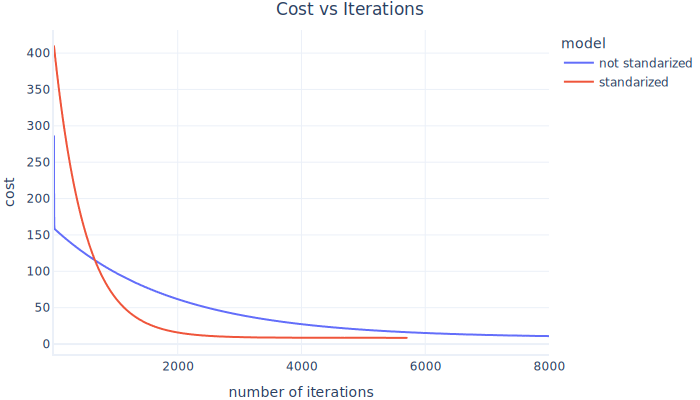

In [8]:
# Compare two models

cost1 = model.cost_history
cost2 = model_norm.cost_history

# Create df with the cost for each model
df1 = pd.DataFrame({"cost": cost1, "model": "not standarized"})
df1["number of iterations"] = df1.index + 1

df2 = pd.DataFrame({"cost": cost2, "model": "standarized"})
df2["number of iterations"] = df2.index + 1

df = pd.concat([df1, df2])

pio.renderers.default = 'svg'
# Plot cost for each model
fig = gr.scatter_2D(df, label_x="number of iterations", label_y="cost", title='Cost vs Iterations', label_colour="model")
fig.update_traces(mode='lines')
fig.show()